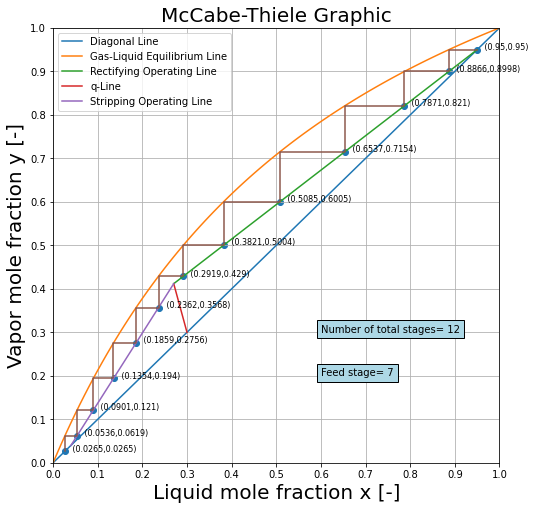

In [59]:
import numpy as np
import matplotlib.pyplot as plt
### VARIABLES
alpha=2.43     #alpha: relative volatility=平均相対揮発度

q=0.79         #q: feed condition parameter=原料供給態度を表す値（0-1のときは気液混合比。1が沸点の液、０が飽和蒸気に相当）
if q==1:
    q=0.99999999999999
zf=0.3        #zf:mole fractions of feed=原料液組成（モル分率）
xd=0.95       #xd:  mole fractions of distillate=留出液組成（モル分率）
xw=0.04       #xw:  mole fractions of bottoms=缶出液組成　（モル分率）
R=3.8         #R: reflux ratio=還流比　L/D
#__________________________________________________________________________________________


### 対角線=Diagonal Line
x=np.linspace(0,1,101)
yd=x #対角線
### 気液平衡線=Gas-Liquid Equilibrium Curve
ye=(alpha*x)/((alpha-1)*x+1)#気液平衡線

### 濃縮部操作線=Rectifying Operating Line
xi=(zf/(1-q)-xd/(R+1))/(R/(R+1)+q/(1-q)) #point of intersection between Rectifying operating line, q-Line and Stripping Operating Line with respect to the coordinate x
def yrectifying(x):
    return R*x/(R+1)+xd/(R+1) 
xr=np.linspace(xd,xi)
yr=yrectifying(xr) ##濃縮部操作線
### q線=q-Line
def yqline(x):
    return -q*x/(1-q)+zf/(1-q) 
xq=np.linspace(zf,xi)
yq=yqline(xq) ##q線

### 回収部操作線=Stripping Operating Line
def ystripping(x):
    m=(yqline(xi)-xw)/(xi-xw) ##Slope of the Stripping operating line
    return m*x-m*xw+xw   
xs=np.linspace(xw,xi)
ys=ystripping(xs)  ##回収部操作線
#__________________________________________________________________________________________
### Graphing the stages of  the Rectifying Section
yi=yqline(xi) #point of intersection between Rectifying operating line, q-Line and Stripping Operating Line with respect to the coordinate y
py=[0] ##py symbolizes the lines of the stages with respect to the coordinate y
px=[0] ##px symbolizes the lines of the stages with respect to the coordinate x
py[0]=xd
px[0]=xd
i=1 ## i=1 represents the first starting point of px and py
while px[i-1]>xi and py[i-1]>yi:  ##  With this condition we find the stages of the Rectifying Section
    py.append(0)
    py[i]=py[i-1]  
    px.append(0)
    px[i]=py[i]/(alpha-(alpha-1)*py[i])
    
    px.append(0)
    px[i+1]=px[i]
    py.append(0)
    py[i+1]=yrectifying(px[i+1])
    i=i+2
py[-1]=ystripping(px[-1])
a=len(px)

### Graphing the stages of  the Stripping Section
k=a
while px[k-1]>xw and py[k-1]>xw: ## With this condition we find the stages of the Stripping Section
    py.append(0)
    py[k]=py[k-1]  
    px.append(0)
    px[k]=py[k]/(alpha-(alpha-1)*py[k])
    
    px.append(0)
    px[k+1]=px[k]
    py.append(0)
    py[k+1]=ystripping(px[k+1])
    k=k+2
py[-1]=px[-1]
#__________________________________________________________________________________________
### Plotting of all lines and curves according to the McCabe-Thiele method

plt.figure(figsize=(8,8))
plt.plot(x,yd,label='Diagonal Line') #対角線
plt.plot(x,ye, label='Gas-Liquid Equilibrium Line') #気液平衡線
plt.plot(xr,yr, label='Rectifying Operating Line') #濃縮部操作線
plt.plot(xq,yq, label='q-Line') #q線
plt.plot(xs,ys, label='Stripping Operating Line' ) #回収部操作線
plt.plot(px,py) #stages
plt.grid()
plt.title('McCabe-Thiele Graphic', fontsize=20)
plt.xlabel('Liquid mole fraction x [-]', fontsize=20)
plt.ylabel('Vapor mole fraction y [-]', fontsize=20)
plt.xticks(np.linspace(0,1,11))
plt.yticks(np.linspace(0,1,11))
plt.axis([0, 1, 0, 1])
plt.legend()
### With this function Number of total stages and Feed stage are inserted to the graph
T=int((len(px)-1)/2) ##Number of total stages
F=int((a-1)/2)  ## Feed stag
plt.text(0.6,0.3,"Number of total stages= "+str(T), bbox={"fc":"lightblue"})
plt.text(0.6,0.2,"Feed stage= "+str(F), bbox={"fc":"lightblue"})
### With this function we mark each stage with its respective value (x, y)
rpx = np.round(px[::2],decimals=4)
rpy = np.round(py[::2],decimals=4)
for i_x, i_y in zip(rpx,rpy):
    plt.text(i_x, i_y , '   ({},{})'.format(i_x, i_y ), fontsize=8)
plt.scatter(rpx,rpy)
plt.show()
